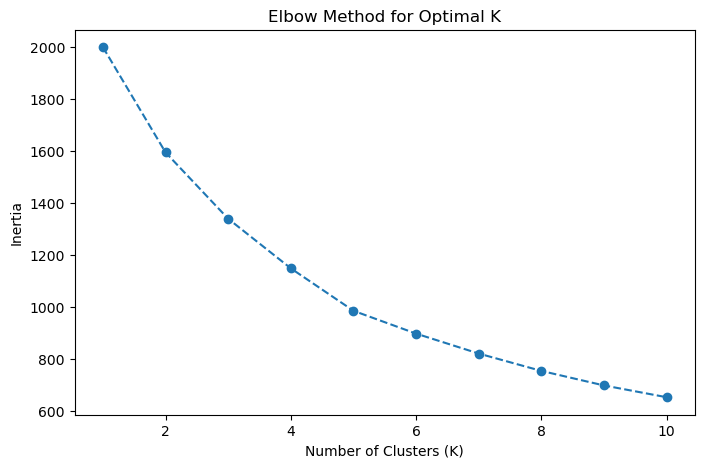

/Users/zexing/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zexing/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zexing/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


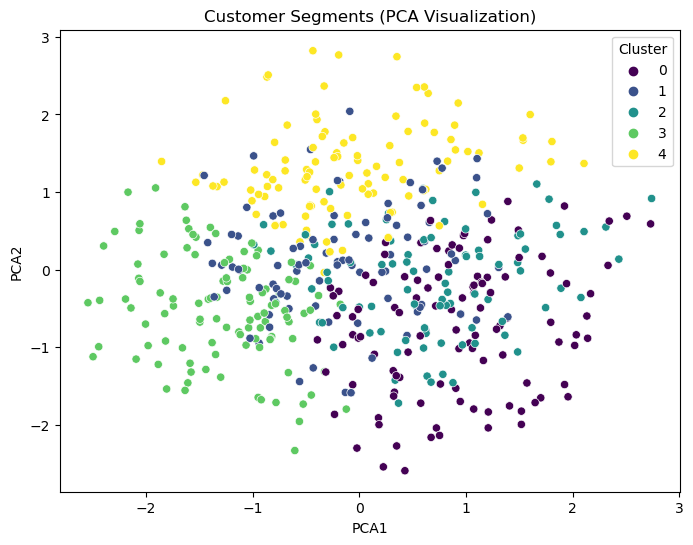

ModuleNotFoundError: No module named 'ace_tools'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Generate Synthetic Customer Data
np.random.seed(42)

num_samples = 500  # Number of customers

data = {
    "Age": np.random.randint(18, 75, num_samples),
    "Trip_Duration": np.random.randint(3, 30, num_samples),  # Days
    "Coverage_Amount": np.random.randint(5000, 50000, num_samples),  # Insurance coverage in USD
    "Past_Claims": np.random.randint(0, 5, num_samples),  # Number of past claims
}

df = pd.DataFrame(data)

# 2. Standardize the Data for Clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Determine Optimal Clusters Using the Elbow Method
inertia = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# 4. Apply K-Means Clustering with Optimal K
optimal_k = 5  # Choose based on the elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(scaled_data)

# 5. Visualize the Segments Using PCA (for 2D representation)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue=df["Cluster"], palette="viridis", data=df)
plt.title("Customer Segments (PCA Visualization)")
plt.show()

# 6. Analyze Cluster Characteristics
cluster_summary = df.groupby("Cluster").mean()
import ace_tools as tools
tools.display_dataframe_to_user(name="Cluster Summary", dataframe=cluster_summary)
